# Packages and data

In [1]:
import tensorflow
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Add a google drive to this session

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip '/content/drive/MyDrive/pliki/Dataset.zip'

Archive:  /content/drive/MyDrive/pliki/Dataset.zip
   creating: Dataset/test/
   creating: Dataset/test/001/
  inflating: Dataset/test/001/001_21.PNG  
  inflating: Dataset/test/001/001_22.PNG  
  inflating: Dataset/test/001/001_23.PNG  
  inflating: Dataset/test/001/001_24.PNG  
   creating: Dataset/test/001_forg/
  inflating: Dataset/test/001_forg/0201001_02.png  
  inflating: Dataset/test/001_forg/0201001_03.png  
  inflating: Dataset/test/001_forg/0201001_04.png  
   creating: Dataset/test/002/
  inflating: Dataset/test/002/002_21.PNG  
  inflating: Dataset/test/002/002_22.PNG  
  inflating: Dataset/test/002/002_23.PNG  
  inflating: Dataset/test/002/002_24.PNG  
   creating: Dataset/test/002_forg/
  inflating: Dataset/test/002_forg/0118002_03.png  
  inflating: Dataset/test/002_forg/0118002_04.png  
   creating: Dataset/test/003/
  inflating: Dataset/test/003/003_21.PNG  
  inflating: Dataset/test/003/003_22.PNG  
  inflating: Dataset/test/003/003_23.PNG  
  inflating: Dataset/tes

In [4]:
train_dir="/content/Dataset//train/"
test_dir="/content/Dataset/test/"
SIZE = 256

train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir(train_dir):
    for data in glob.glob(train_dir+per+'/*.*'):
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

#Test Data

test_data = []
test_labels = []

for per in os.listdir(test_dir):
    for data in glob.glob(test_dir+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)
test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [5]:
train_labels_c = to_categorical(train_labels)
test_labels_c = to_categorical(test_labels)

In [6]:
input_shape = (SIZE, SIZE, 3)
batch_size = 125
nr_epochs = 10
validation_split = 0.2
verbosity = 1

# Model #1

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='linear'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)            0

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    batch_size=batch_size,
                    epochs=8,
                    verbose=verbosity,
                    validation_split=validation_split,
                    validation_data=(test_data, test_labels))

Epoch 1/8
11/11 [==============================] - 21s 977ms/step - loss: 3.9126 - accuracy: 0.5037 - val_loss: 0.7052 - val_accuracy: 0.4851
Epoch 2/8
11/11 [==============================] - 3s 238ms/step - loss: 0.6889 - accuracy: 0.5587 - val_loss: 0.6243 - val_accuracy: 0.5413
Epoch 3/8
11/11 [==============================] - 3s 242ms/step - loss: 0.5781 - accuracy: 0.7184 - val_loss: 0.4382 - val_accuracy: 0.7822
Epoch 4/8
11/11 [==============================] - 3s 269ms/step - loss: 0.4363 - accuracy: 0.8640 - val_loss: 0.3518 - val_accuracy: 0.8779
Epoch 5/8
11/11 [==============================] - 3s 292ms/step - loss: 0.2419 - accuracy: 0.9116 - val_loss: 0.2506 - val_accuracy: 0.9208
Epoch 6/8
11/11 [==============================] - 3s 246ms/step - loss: 0.1754 - accuracy: 0.9383 - val_loss: 0.5024 - val_accuracy: 0.8713
Epoch 7/8
11/11 [==============================] - 3s 248ms/step - loss: 0.1165 - accuracy: 0.9577 - val_loss: 0.2210 - val_accuracy: 0.9241
Epoch 8/8
11

10/10 - 1s - loss: 0.3159 - accuracy: 0.9208 - 1s/epoch - 129ms/step


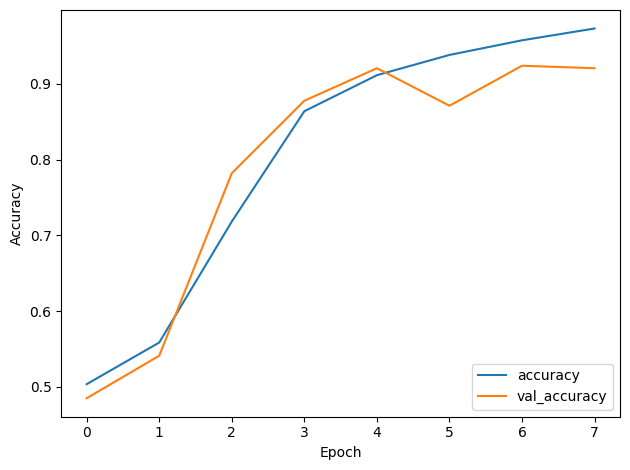

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

plt.tight_layout()
plt.show()

10/10 - 0s - loss: 0.3159 - accuracy: 0.9208 - 296ms/epoch - 30ms/step


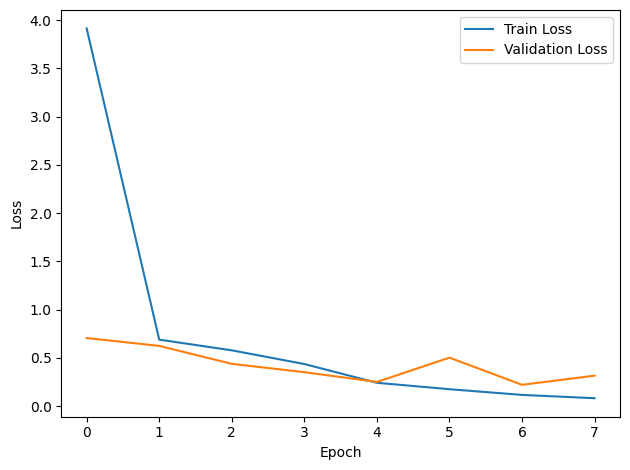

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

plt.tight_layout()
plt.show()

# Model #2

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='linear'))


model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    batch_size=batch_size,
                    epochs=8,
                    verbose=verbosity,
                    validation_split=validation_split,
                    validation_data=(test_data, test_labels))

# Confusion matrix


10/10 [==============================] - 1s 35ms/step


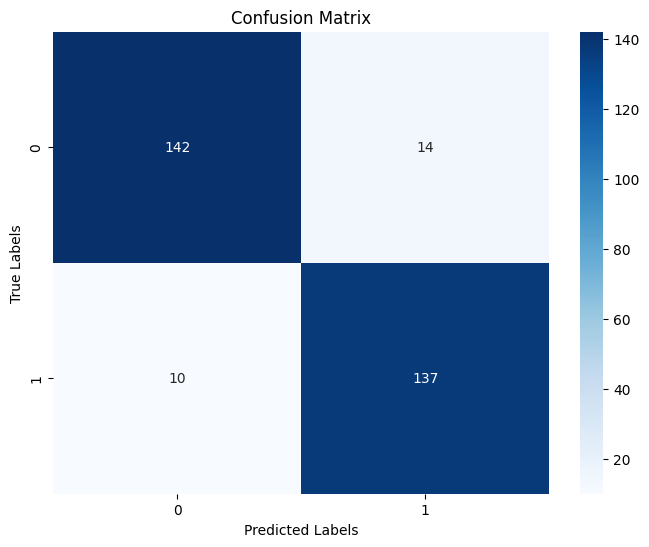

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_labels


cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Random indices generating


In [12]:
import numpy as np
samples = 2
# Randomly select unique imgs from the train dataset
random_indices = np.random.choice(len(train_data), size=samples, replace=False)

# Create a subset
train_subset = train_data[random_indices]

# Store the indexes in a list
random_indices_list = random_indices.tolist()
print(random_indices_list)

predictions = model.predict(train_data)
predictions_subset = [np.argmax(predictions[i]) for i in random_indices_list]

[1225, 121]
43/43 [==============================] - 1s 26ms/step


# Shap

In [13]:
!pip install shap
import shap
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
from shap._explanation import Explanation
from shap.utils import ordinal_str
from shap.utils._legacy import kmeans
from shap.plots import colors

name_list = ["genuine", "forged"]
train_data_subset = train_subset
# Define an Image masker with "inpaint_telea" method and shape of the first image in train_data_subset
masker = shap.maskers.Image("inpaint_telea", train_data_subset[0].shape)

# Initialize an Explainer using PartitionExplainer with the Image masker
explainer = shap.Explainer(model, masker, output_names=name_list, base_values = 0.5)

# Generate SHAP values for the subset
shap_values = explainer(train_data_subset, max_evals=250, batch_size=50)
print(shap_values.base_values)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.9 MB/s eta 0:00:00


  0%|          | 0/248 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:33, 16.74s/it]

[[ 2.2681129  -1.77469099]
 [ 2.24321437 -1.75526881]]


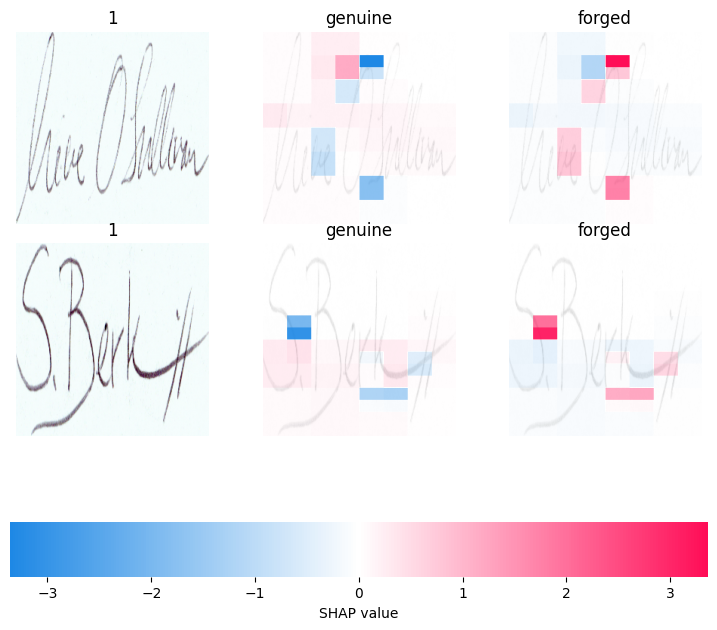

In [18]:
plot_shap(shap_values, labels = name_list, show = False, true_labels=predictions_subset)
plt.savefig('/content/drive/MyDrive/pliki/FINALJPG/model1_shap_2signs_new.png')
plt.show()

In [19]:
import json
import random
import string
from typing import Optional

import matplotlib.pyplot as pl
import numpy as np
from matplotlib.colors import Colormap

try:
    from IPython.display import HTML, display
    have_ipython = True
except ImportError:
    have_ipython = False

In [20]:
def plot_shap(shap_values: Explanation or np.ndarray,
          pixel_values: Optional[np.ndarray] = None,
          labels: Optional[list or np.ndarray] = None,
          true_labels: Optional[list] = None,
          width: Optional[int] = 50,
          aspect: Optional[float] = 0.7,
          hspace: Optional[float] = 0.1,
          labelpad: Optional[float] = None,
          cmap: Optional[str or Colormap] = colors.red_transparent_blue,
          show: Optional[bool] = True):

    # support passing an explanation object

    if str(type(shap_values)).endswith("Explanation'>"):
        shap_exp = shap_values
        # feature_names = [shap_exp.feature_names]
        # ind = 0
        if len(shap_exp.output_dims) == 1:
            shap_values = [shap_exp.values[..., i] for i in range(shap_exp.values.shape[-1])]
        elif len(shap_exp.output_dims) == 0:
            shap_values = shap_exp.values
        else:
            raise Exception("Number of outputs needs to have support added!! (probably a simple fix)")
        if pixel_values is None:
            pixel_values = shap_exp.data
        if labels is None:
            labels = shap_exp.output_names
            print(shap_exp.output_names)

    # multi_output = True
    if not isinstance(shap_values, list):
        # multi_output = False
        shap_values = [shap_values]

    if len(shap_values[0].shape) == 3:
        shap_values = [v.reshape(1, *v.shape) for v in shap_values]
        pixel_values = pixel_values.reshape(1, *pixel_values.shape)

    # labels: (rows (images) x columns (top_k classes) )
    if labels is not None:
        if isinstance(labels, list):
            labels = np.array(labels).reshape(1, -1)

    # if labels is not None:
    #     labels = np.array(labels)
    #     if labels.shape[0] != shap_values[0].shape[0] and labels.shape[0] == len(shap_values):
    #         labels = np.tile(np.array([labels]), shap_values[0].shape[0])
    #     assert labels.shape[0] == shap_values[0].shape[0], "Labels must have same row count as shap_values arrays!"
    #     if multi_output:
    #         assert labels.shape[1] == len(shap_values), "Labels must have a column for each output in shap_values!"
    #     else:
    #         assert len(labels[0].shape) == 1, "Labels must be a vector for single output shap_values."

    label_kwargs = {} if labelpad is None else {'pad': labelpad}

    # plot our explanations
    x = pixel_values
    fig_size = np.array([3 * (len(shap_values) + 1), 2.5 * (x.shape[0] + 1)])
    if fig_size[0] > width:
        fig_size *= width / fig_size[0]
    fig, axes = pl.subplots(nrows=x.shape[0], ncols=len(shap_values) + 1, figsize=fig_size)
    if len(axes.shape) == 1:
        axes = axes.reshape(1, axes.size)
    for row in range(x.shape[0]):
        x_curr = x[row].copy()

        # make sure we have a 2D array for grayscale
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 1:
            x_curr = x_curr.reshape(x_curr.shape[:2])

        # if x_curr.max() > 1:
        #     x_curr /= 255.

        # get a grayscale version of the image
        if len(x_curr.shape) == 3 and x_curr.shape[2] == 3:
            x_curr_gray = (
                    0.2989 * x_curr[:, :, 0] + 0.5870 * x_curr[:, :, 1] + 0.1140 * x_curr[:, :, 2])  # rgb to gray
            x_curr_disp = x_curr
        elif len(x_curr.shape) == 3:
            x_curr_gray = x_curr.mean(2)

            # for non-RGB multi-channel data we show an RGB image where each of the three channels is a scaled k-mean center
            flat_vals = x_curr.reshape([x_curr.shape[0] * x_curr.shape[1], x_curr.shape[2]]).T
            flat_vals = (flat_vals.T - flat_vals.mean(1)).T
            means = kmeans(flat_vals, 3, round_values=False).data.T.reshape([x_curr.shape[0], x_curr.shape[1], 3])
            x_curr_disp = (means - np.percentile(means, 0.5, (0, 1))) / (
                    np.percentile(means, 99.5, (0, 1)) - np.percentile(means, 1, (0, 1)))
            x_curr_disp[x_curr_disp > 1] = 1
            x_curr_disp[x_curr_disp < 0] = 0
        else:
            x_curr_gray = x_curr
            x_curr_disp = x_curr

        axes[row, 0].imshow(x_curr_disp, cmap=pl.get_cmap('gray'))
        if true_labels:
            axes[row, 0].set_title(true_labels[row], **label_kwargs)
        axes[row, 0].axis('off')
        if len(shap_values[0][row].shape) == 2:
            abs_vals = np.stack([np.abs(shap_values[i]) for i in range(len(shap_values))], 0).flatten()
        else:
            abs_vals = np.stack([np.abs(shap_values[i].sum(-1)) for i in range(len(shap_values))], 0).flatten()

        max_val = np.nanpercentile(abs_vals, 99.9)

        for i in range(len(shap_values)):
            if labels is not None:

                axes[row, i + 1].set_title(labels[0, i], **label_kwargs)
            sv = shap_values[i][row] if len(shap_values[i][row].shape) == 2 else shap_values[i][row].sum(-1)
            axes[row, i + 1].imshow(x_curr_gray, cmap=pl.get_cmap('gray'), alpha=0.15,
                                    extent=(-1, sv.shape[1], sv.shape[0], -1))
            im = axes[row, i + 1].imshow(sv, cmap=cmap, vmin=-max_val, vmax=max_val)
            axes[row, i + 1].axis('off')
    if hspace == 'auto':
        fig.tight_layout()
    else:
        fig.subplots_adjust(hspace=hspace)
    cb = fig.colorbar(im, ax=np.ravel(axes).tolist(), label="SHAP value", orientation="horizontal",
                      aspect=fig_size[0] / aspect)
    cb.outline.set_visible(False)
    if show:
        pl.show()

# Saliency map


In [21]:
! pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:00


In [22]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [23]:
def show_saliency_map(image, model, image_id) :
    img_batch = (np.expand_dims(image, 0))
    # creating saliency object
    saliency = Saliency(model)
    # creating loss function
    loss = lambda output: tf.keras.backend.mean(output[:, tf.argmax(train_labels_c[image_id])])

    # creating and normalizing saliency map
    saliency_map = saliency(loss, img_batch)
    saliency_map = normalize(saliency_map)

    # reshaping for vizualization
    sal_vis = saliency_map.reshape(saliency_map.shape[1], saliency_map.shape[2])

    # showing the map
    return sal_vis

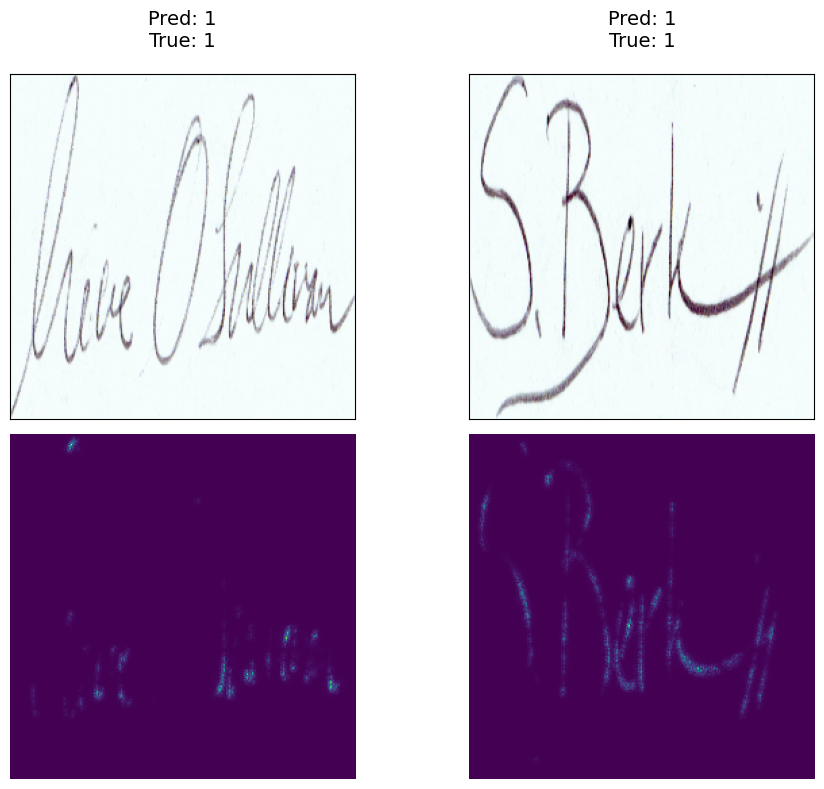

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

num_images = len(train_subset)

for i in range(num_images):
    # Display the original image with predicted and true labels
    plt.subplot(2, num_images, i + 1)  # First row for images
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_subset[i])  # Plot the original image

    # Add titles for predicted and true labels
    true_label = train_labels[random_indices_list[i]]   # Get the true label for the current index
    predicted_label = predictions_subset[i]  # Get the predicted label for the current index
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=14, pad=20)  # Set title with padding

    # Display the saliency map
    plt.subplot(2, num_images, num_images + i + 1)  # Second row for saliency maps
    saliency_map = show_saliency_map(train_subset[i], model, i)  # Get the saliency map
    plt.imshow(saliency_map, cmap='viridis')  # Plot the saliency map
    plt.axis('off')  # Hide axis

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.tight_layout()
plt.show()


# Lime

In [25]:
# Install the LIME package
!pip install lime
import os
import lime
from lime import lime_tabular
from lime.lime_image import LimeImageExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=928c36e91981d9ae9fe1d14ca496fbfe0fadcc4a13495d4154a76ef46e3ac901
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [26]:
# Define a function to predict using the model
def predict_fn(images):
    return model.predict(images)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


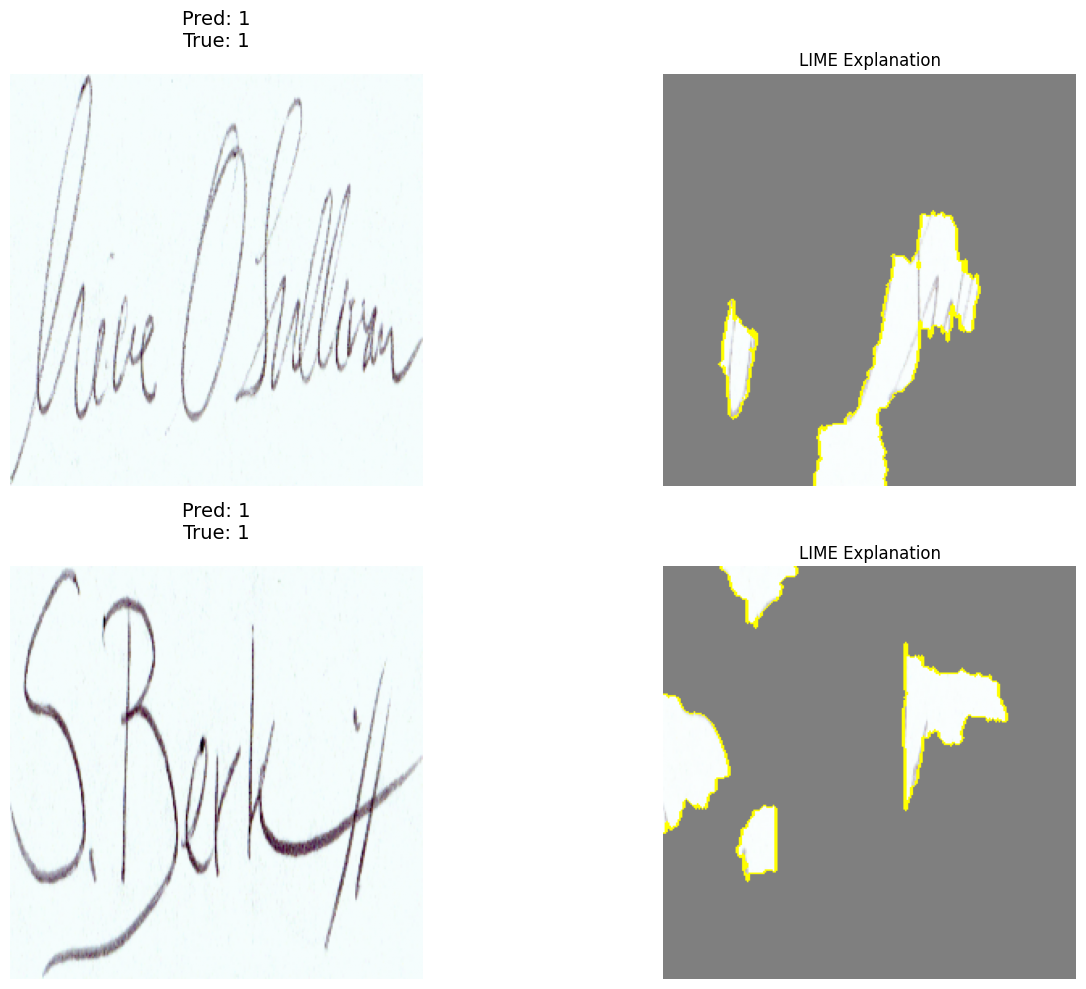

In [27]:
from skimage.segmentation import mark_boundaries
plt.figure(figsize=(15, 10))
num_images = len(train_subset)
explainer = LimeImageExplainer()

for i in range(num_images):
    img = train_subset[i]
    pred_label = predictions_subset[i]
    # Explain the prediction for the image using Lime
    explanation = explainer.explain_instance(img, predict_fn, top_labels=1, hide_color=0)
    explanation_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)


    img = train_subset[i]
    pred_label = predictions_subset[i]
   # Plot original image with predicted label above it
    plt.subplot(num_images, 2, 2*i + 1)
    plt.imshow(img)
    plt.axis('off')

    true_label = train_labels[random_indices_list[i]]   # Get the true label for the current index
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=14, pad=20)  # Set title with padding

    # Plot Lime explanation on the right
    plt.subplot(num_images, 2, 2*i + 2)
    plt.imshow(mark_boundaries(explanation_image/ 2 + 0.5, mask))
    plt.title('LIME Explanation')
    plt.axis('off')

plt.tight_layout()
plt.show()

# GradCAM Heatmap

In [32]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )


    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    #heatmap = 1 - heatmap
    return heatmap.numpy()

In [33]:
import matplotlib
def save_and_display_gradcam(img, heatmap, alpha=0.4):
    # Load the original image

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    #jet = cm.get_cmap("jet")
    jet = matplotlib.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Invert the colormap
    #jet_heatmap = 1 - jet_heatmap  # Invert the heatmap values

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    return superimposed_img

In [37]:
last_conv_layer_name = 'conv2d_2'
model.layers[-1].activation = None

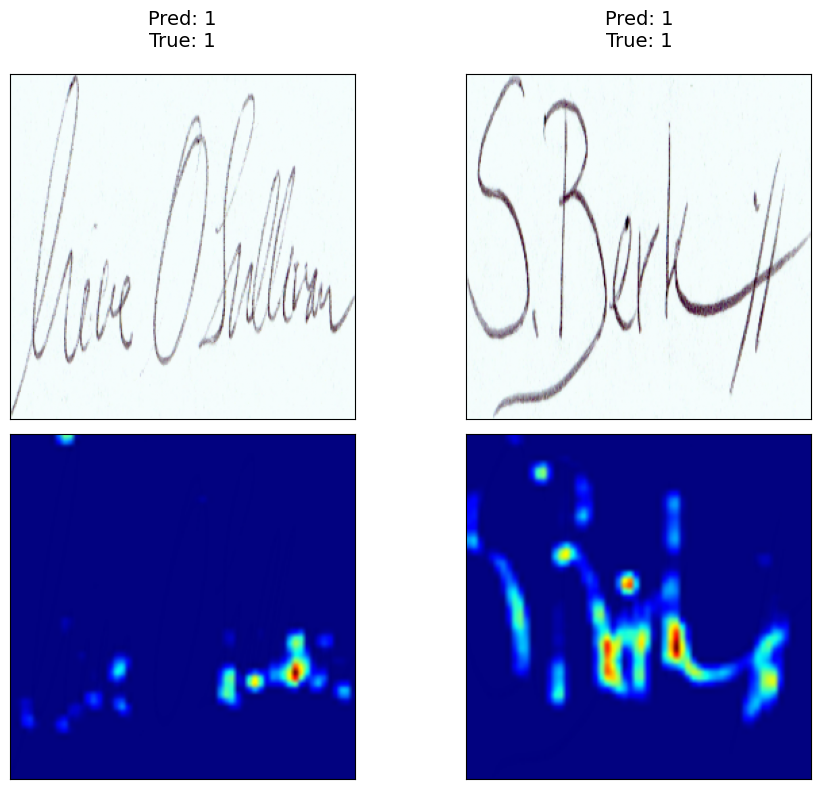

In [38]:
plt.figure(figsize=(10, 8))

num_images = len(train_subset)
for i in range(num_images):
    img = train_subset[i]

    # Get the predicted label for the current image
    pred_label = predictions_subset[i]

    # Display original image with predicted label above it
    plt.subplot(2, num_images, i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    true_label = train_labels[random_indices_list[i]]   # Get the true label for the current index
    predicted_label = predictions_subset[i]  # Get the predicted label for the current index
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=14, pad=20)  # Set title with padding

    # Display GradCAM heatmap (adjust as per your actual implementation)
    plt.subplot(2, num_images, num_images + i + 1)
    img_array = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    overlaid_img = save_and_display_gradcam(img, heatmap)
    plt.imshow(overlaid_img, cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

# Adjust spacing between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)
plt.show()


# Relevant area


In [42]:
import numpy as np

def compute_relevant_area_shap(shap_values, threshold=0.01):
    important_pixels = np.sum(np.abs(shap_values) > threshold)
    total_pixels = shap_values.size
    return important_pixels / total_pixels

def compute_relevant_area_saliency(saliency_map, threshold=0.01):
    important_pixels = np.sum(np.abs(saliency_map) > threshold)
    total_pixels = saliency_map.size
    return important_pixels / total_pixels

def compute_relevant_area_lime(mask):
    important_pixels = np.sum(mask > 0)
    total_pixels = mask.size
    return important_pixels / total_pixels

def compute_relevant_area_gradcam(heatmap, threshold=0.1):
    important_pixels = np.sum(heatmap > threshold)
    total_pixels = heatmap.size
    return important_pixels / total_pixels


In [44]:
import pandas as pd

# Initialize an empty list to store the sparsity results for all images
relevant_area_data = []

num_images = len(train_subset)  # Set the number of images you want to evaluate

for i in range(num_images):
    img = train_subset[i]

    # SHAP relevant area
    shap_image_explanation = shap_values[i].values[..., 0]
    relevant_area_shap = compute_relevant_area_shap(shap_image_explanation)

    # Saliency map relevant area
    saliency_map = show_saliency_map(train_data_subset[i], model, i)
    relevant_area_saliency = compute_relevant_area_saliency(saliency_map)

    # LIME relevant area
    explanation = explainer.explain_instance(img, predict_fn, top_labels=1, hide_color=0)
    explanation_image, lime_mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    relevant_area_lime = compute_relevant_area_lime(lime_mask)

    # Grad-CAM relevant area
    img_array = np.expand_dims(img, axis=0)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    relevant_area_gradcam = compute_relevant_area_gradcam(heatmap)

    # Append the results to the list
    relevant_area_data.append({
        'Image': i + 1,
        'SHAP Relevant Area': relevant_area_shap,
        'Saliency Map Relevant Area': relevant_area_saliency,
        'LIME Relevant Area': relevant_area_lime,
        'Grad-CAM Relevant Area': relevant_area_gradcam
    })

    # Print the results for the current image
    print(f"Image {i+1}:")
    print(f"  SHAP Relevant Area: {relevant_area_shap:.4f}")
    print(f"  Saliency Map Relevant Area: {relevant_area_saliency:.4f}")
    print(f"  LIME Relevant Area: {relevant_area_lime:.4f}")
    print(f"  Grad-CAM Relevant Area: {relevant_area_gradcam:.4f}")

# Create a DataFrame from the list of dictionaries
df_relevant_area = pd.DataFrame(relevant_area_data)

# Save the DataFrame to a CSV file
#df_relevant_area.to_csv('/content/drive/MyDrive/pliki/FINALJPG/relevant_area_results_per_image_model1.csv', index=False)

print("Relevant area results saved to CSV!")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step
Image 1:
  SHAP Relevant Area: 0.8281
  Saliency Map Relevant Area: 0.0476
  LIME Relevant Area: 0.0766
  Grad-CAM Relevant Area: 0.0375


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step
Image 2:
  SHAP Relevant Area: 0.5938
  Saliency Map Relevant Area: 0.1042
  LIME Relevant Area: 0.0652
  Grad-CAM Relevant Area: 0.1431
Relevant area results saved to CSV!
